In [2]:
import pandas as pd

# Load data from CSV
df = pd.read_csv("/content/four-features-all-villages - all_data(5 villages) - Copy of mahalingpur_farm_data_dailyagrre (1).csv.csv")

# Handle missing values by filling with 0
df = df.fillna(0)

# Convert date column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Display the first few rows and check for nulls
display(df.head())
print("\nMissing values after filling:")
print(df.isnull().sum())

,precipitation_mm,temperature_C,lai,fapar,yield,village
date,,,,,,
2007-01-01,0.0,30.035635,11.029443,54.285325,108.25,mahalingpur
2007-01-02,0.0,29.799342,11.143477,54.562126,108.25,mahalingpur
2007-01-03,0.0,29.572417,11.257510,54.838927,108.25,mahalingpur
2007-01-04,0.0,30.142984,11.371544,55.115728,108.25,mahalingpur
2007-01-05,0.0,29.417248,11.485578,55.392530,108.25,mahalingpur



Missing values after filling:
precipitation_mm    0
temperature_C       0
lai                 0
fapar               0
yield               0
village             0
dtype: int64


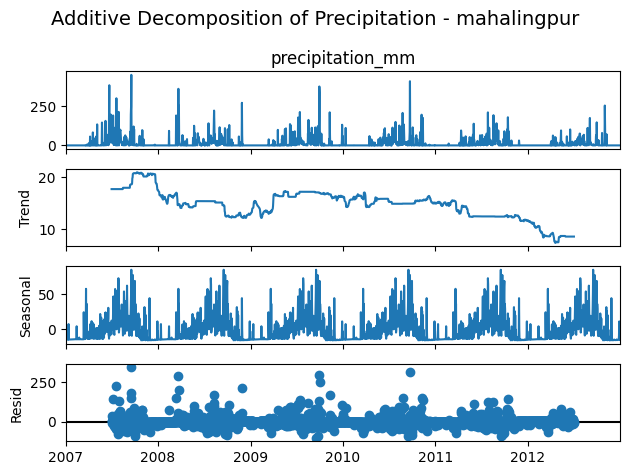

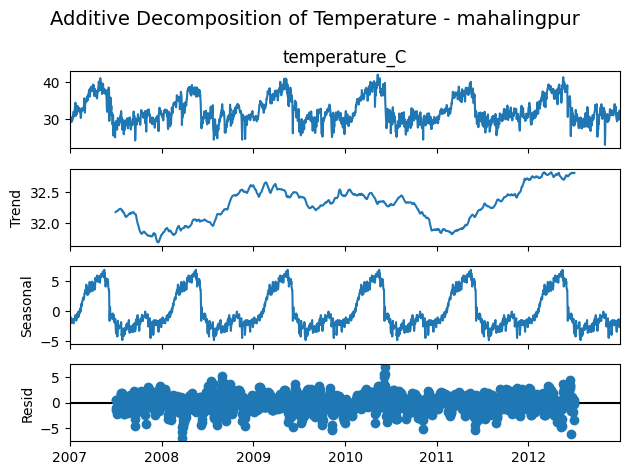

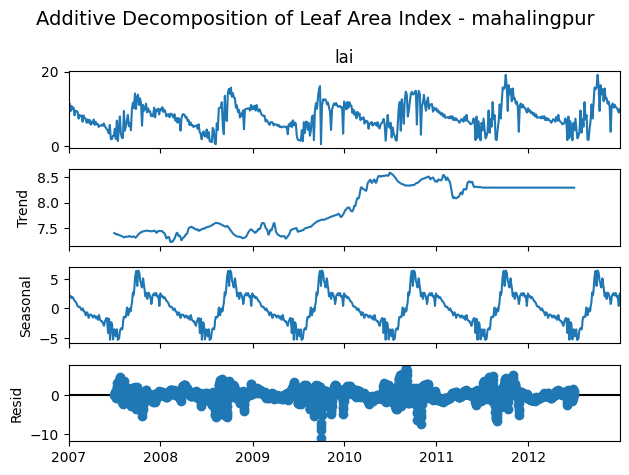

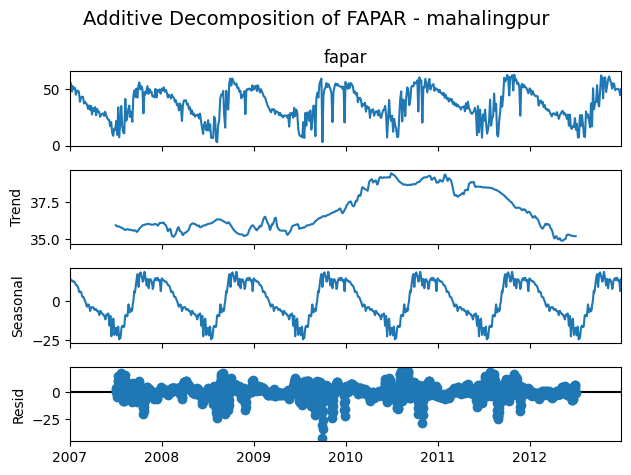

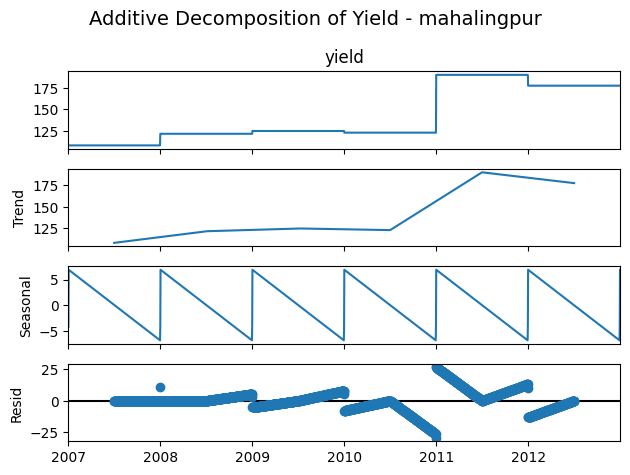

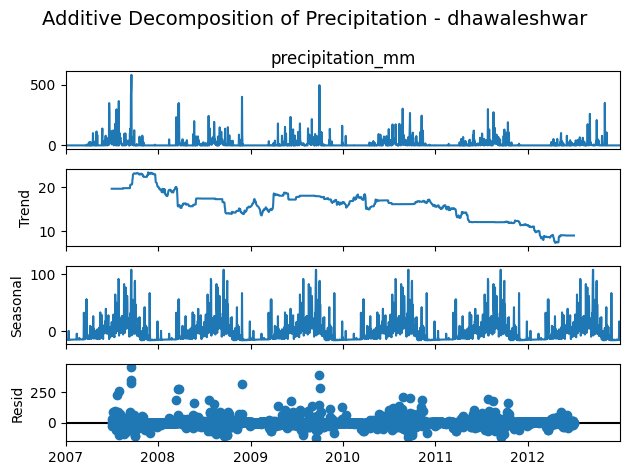

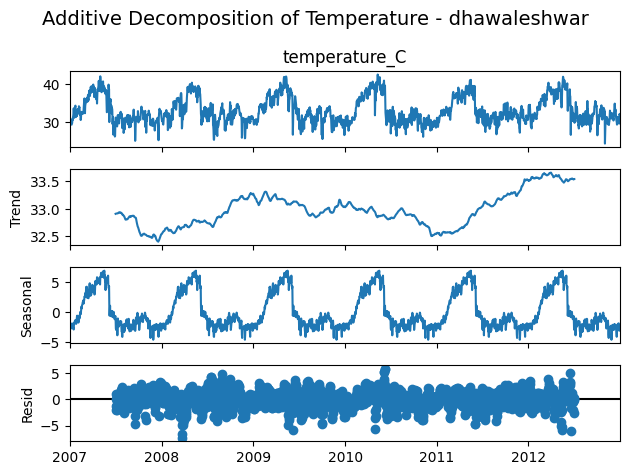

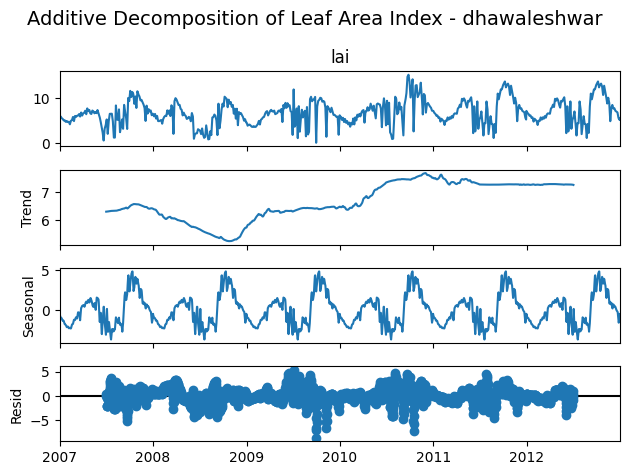

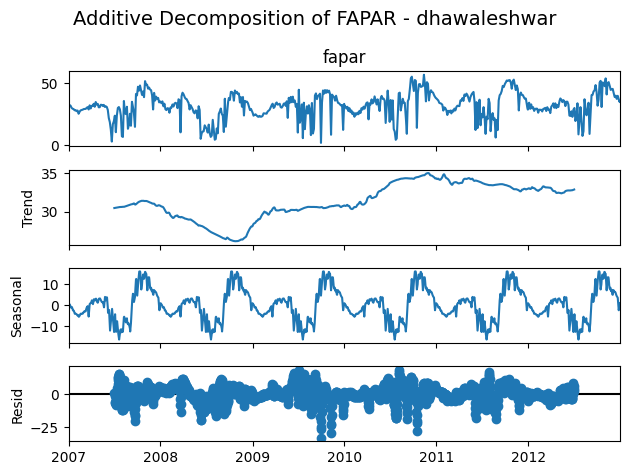

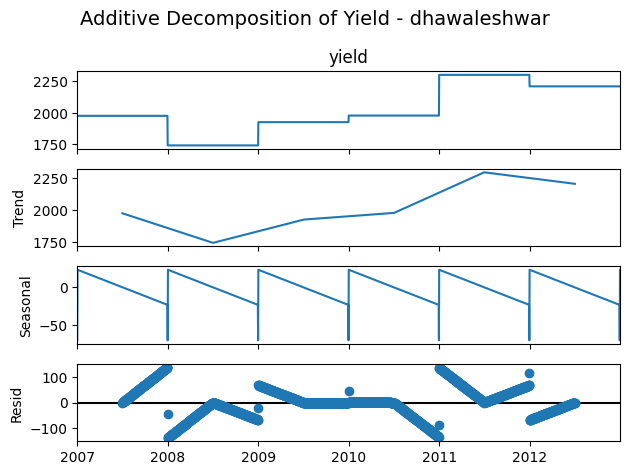

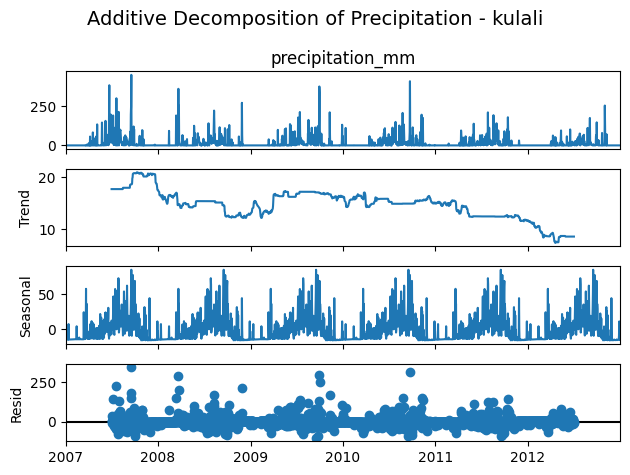

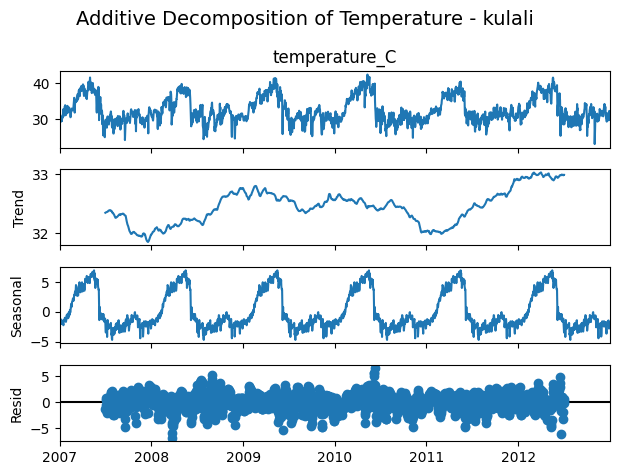

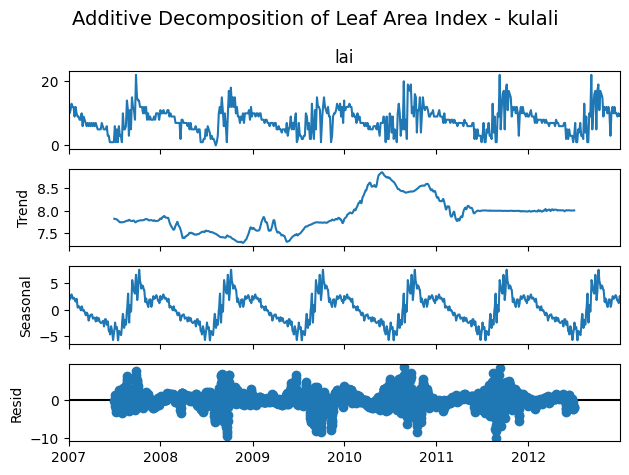

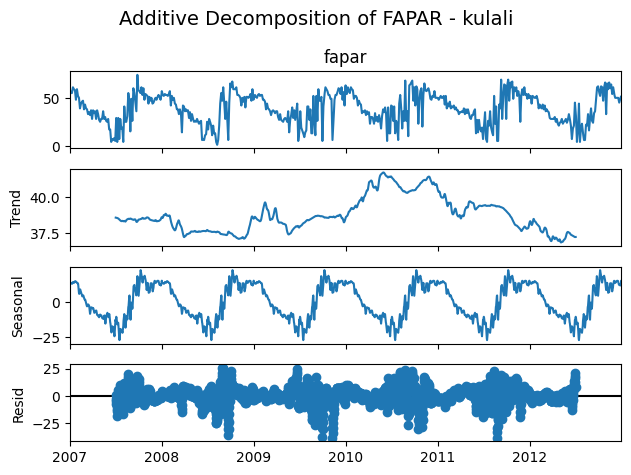

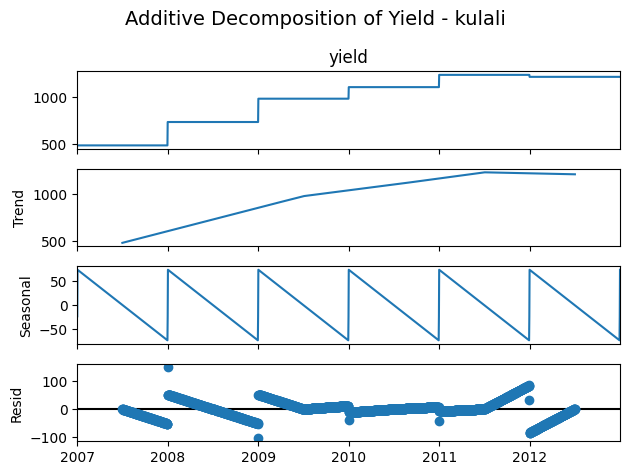

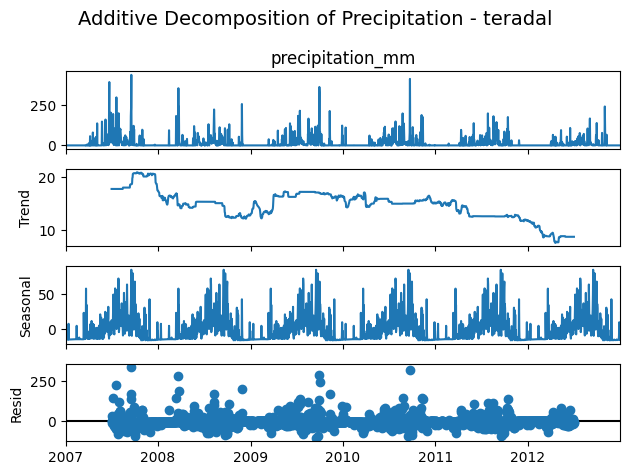

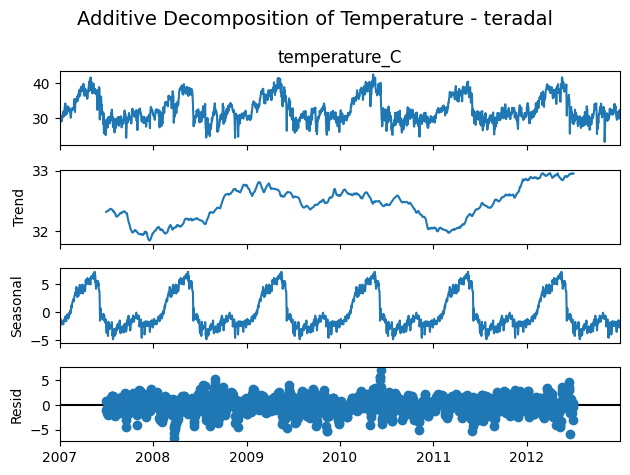

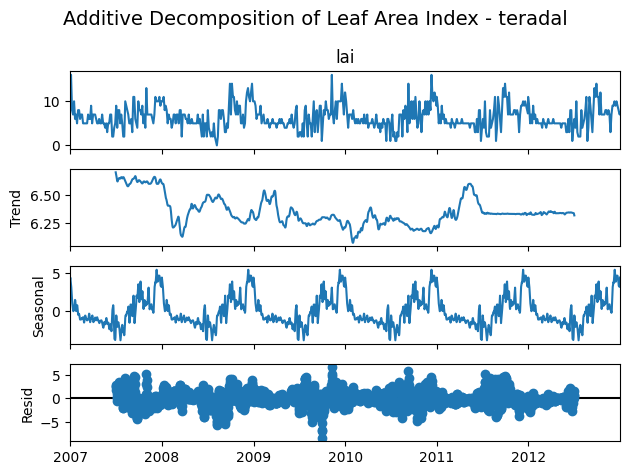

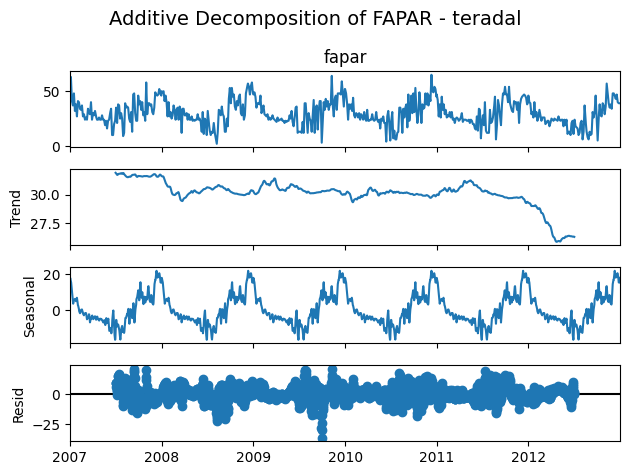

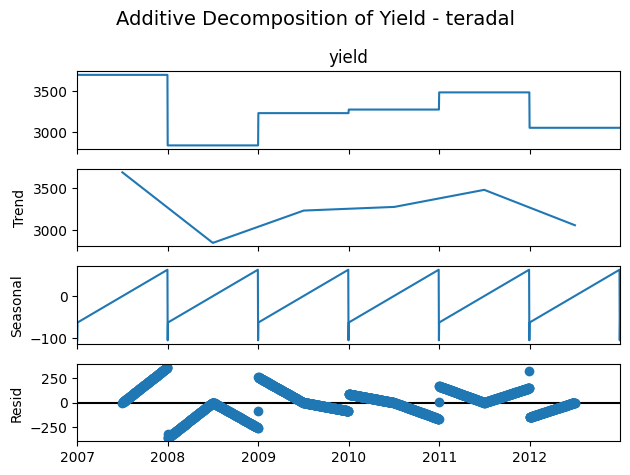

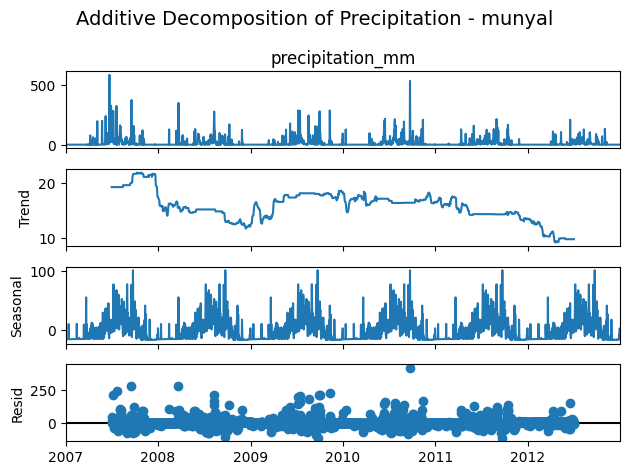

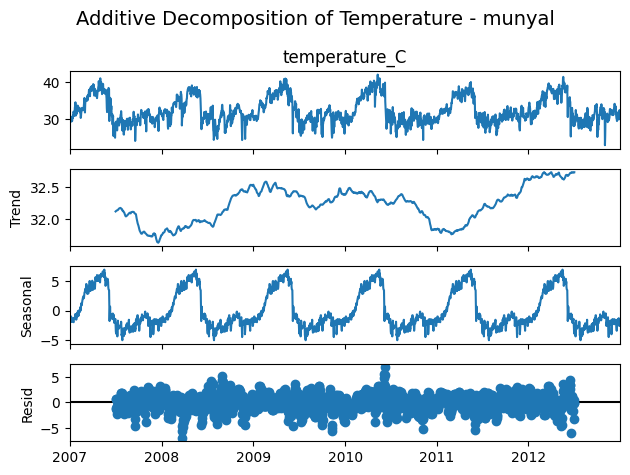

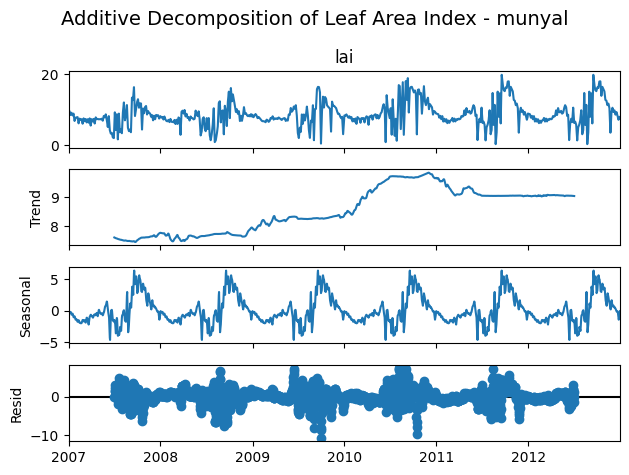

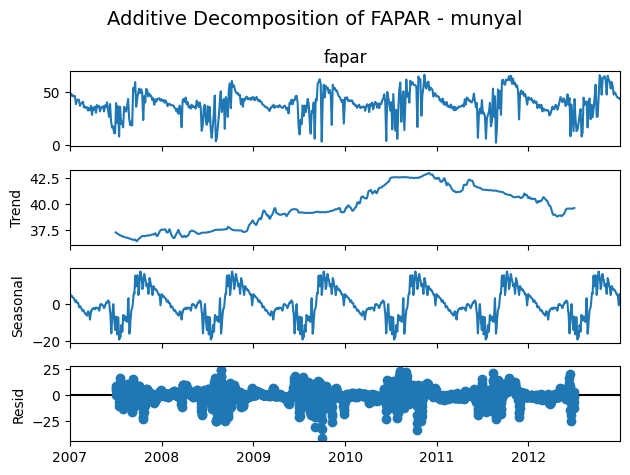

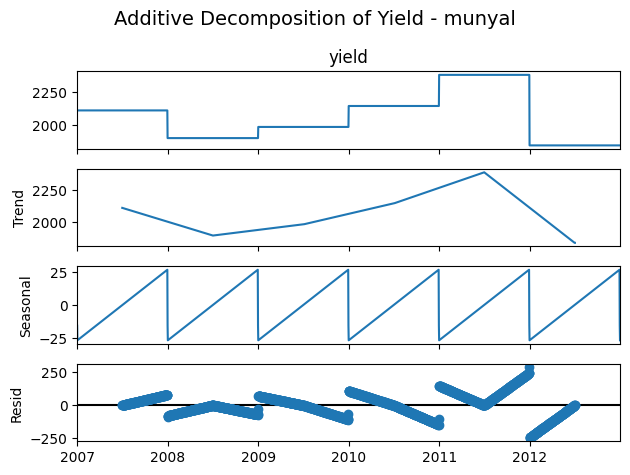

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose each variable for each village
for village in df['village'].unique():
    village_df = df[df['village'] == village].copy()

    # Decompose Precipitation
    try:
        result_precip = seasonal_decompose(village_df['precipitation_mm'], model='additive', period=365)
        result_precip.plot()
        plt.suptitle(f"Additive Decomposition of Precipitation - {village}", fontsize=14)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not decompose precipitation for {village}: {e}")

    # Decompose Temperature
    try:
        result_temp = seasonal_decompose(village_df['temperature_C'], model='additive', period=365)
        result_temp.plot()
        plt.suptitle(f"Additive Decomposition of Temperature - {village}", fontsize=14)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not decompose temperature for {village}: {e}")

        # Decompose lai
    try:
        result_temp = seasonal_decompose(village_df['lai'], model='additive', period=365)
        result_temp.plot()
        plt.suptitle(f"Additive Decomposition of Leaf Area Index - {village}", fontsize=14)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not decompose temperature for {village}: {e}")

        # Decompose fapar
    try:
        result_temp = seasonal_decompose(village_df['fapar'], model='additive', period=365)
        result_temp.plot()
        plt.suptitle(f"Additive Decomposition of FAPAR - {village}", fontsize=14)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not decompose temperature for {village}: {e}")



    # Decompose Yield
    try:
        result_yield = seasonal_decompose(village_df['yield'], model='additive', period=365)
        result_yield.plot()
        plt.suptitle(f"Additive Decomposition of Yield - {village}", fontsize=14)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not decompose yield for {village}: {e}")

In [4]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test and print results
def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f'{name}:')
    print(f'  ADF Statistic: {result[0]:.4f}')
    print(f'  p-value: {result[1]:.4f}')
    print(f'  Critical Values:')
    for key, value in result[4].items():
        print(f'    {key}: {value:.4f}')
    if result[1] <= 0.05:
        print('  Result: Stationary')
    else:
        print('  Result: Non-stationary')
    print("-" * 30)

# Perform ADF test for each variable in each village
for village in df['village'].unique():
    village_df = df[df['village'] == village].copy()
    print(f"Stationarity Tests for {village}:")
    adf_test(village_df['precipitation_mm'], 'Precipitation')
    adf_test(village_df['temperature_C'], 'Temperature')
    adf_test(village_df['lai'], 'LAI')
    adf_test(village_df['fapar'], 'FAPAR')
    adf_test(village_df['yield'], 'Yield')
    print("=" * 50)

Stationarity Tests for mahalingpur:
Precipitation:
  ADF Statistic: -9.9352
  p-value: 0.0000
  Critical Values:
    1%: -3.4334
    5%: -2.8629
    10%: -2.5675
  Result: Stationary
------------------------------
Temperature:
  ADF Statistic: -4.9090
  p-value: 0.0000
  Critical Values:
    1%: -3.4333
    5%: -2.8629
    10%: -2.5675
  Result: Stationary
------------------------------
LAI:
  ADF Statistic: -4.4369
  p-value: 0.0003
  Critical Values:
    1%: -3.4334
    5%: -2.8629
    10%: -2.5675
  Result: Stationary
------------------------------
FAPAR:
  ADF Statistic: -3.5251
  p-value: 0.0074
  Critical Values:
    1%: -3.4334
    5%: -2.8629
    10%: -2.5675
  Result: Stationary
------------------------------
Yield:
  ADF Statistic: -1.0599
  p-value: 0.7308
  Critical Values:
    1%: -3.4333
    5%: -2.8629
    10%: -2.5675
  Result: Non-stationary
------------------------------
Stationarity Tests for dhawaleshwar:
Precipitation:
  ADF Statistic: -10.4903
  p-value: 0.0000
  

# Task
Apply LSTM to the provided data.

## Prepare the data for lstm

### Subtask:
This involves scaling the data, creating sequences (lookback windows) for the LSTM input, and splitting the data into training and testing sets.


**Reasoning**:
Scale the numerical features and create sequences for LSTM input.



In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Select numerical features
features = ['precipitation_mm', 'temperature_C', 'lai', 'fapar', 'yield']
df_features = df[features]

# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_features)

# Function to create sequences
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:(i + lookback)])
        y.append(data[i + lookback, 2]) # Predict 'yield' which is the 3rd column (index 2)
    return np.array(X), np.array(y)

# Define lookback period
lookback_period = 30 # Example lookback period

# Create sequences
X, y = create_sequences(scaled_features, lookback_period)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8744, 30, 5)
Shape of y_train: (8744,)
Shape of X_test: (2186, 30, 5)
Shape of y_test: (2186,)


## Build the lstm model

### Subtask:
Define the architecture of the LSTM model, including the number of layers and units.


**Reasoning**:
Define the LSTM model architecture using Keras Sequential model with LSTM and Dense layers as per the instructions.



In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()

# Add the first LSTM layer
# The input shape is (lookback_period, number_of_features)
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a second LSTM layer (optional, but often improves performance)
model.add(LSTM(units=50))

# Add the output layer
model.add(Dense(units=1))

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

## Train the lstm model

### Subtask:
Compile and train the model using the prepared training data.


**Reasoning**:
Compile and train the defined LSTM model using the prepared training data.



Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - loss: 0.0064 - val_loss: 0.0026
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 9.9660e-04 - val_loss: 0.0011
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 7.0582e-04 - val_loss: 5.7612e-04
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 6.7543e-04 - val_loss: 6.1682e-04
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 5.9086e-04 - val_loss: 6.5568e-04
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 5.7353e-04 - val_loss: 5.8211e-04
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 5.2509e-04 - val_loss: 6.2650e-04
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 5.7215e-04 - val_loss: 5.2570e-04
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 5.6942e-04 - val_loss: 5.2959e-04


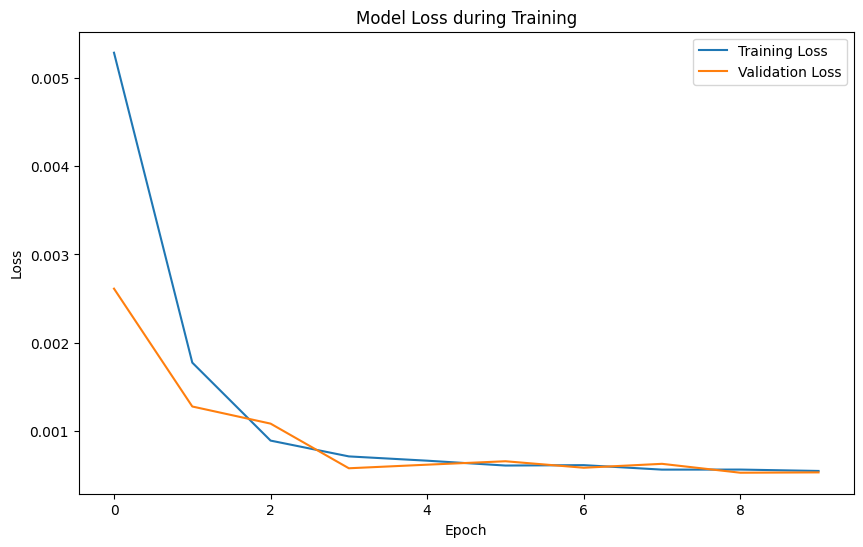

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate the LSTM model

### Subtask:
Assess the model's performance using the testing data and relevant metrics.

**Reasoning**:
Evaluate the trained LSTM model using the testing data to determine its performance.

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Root Mean Squared Error (RMSE): 0.5755


/tmp/ipython-input-123167580.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2007-01", periods=len(y_test_original), freq="M")


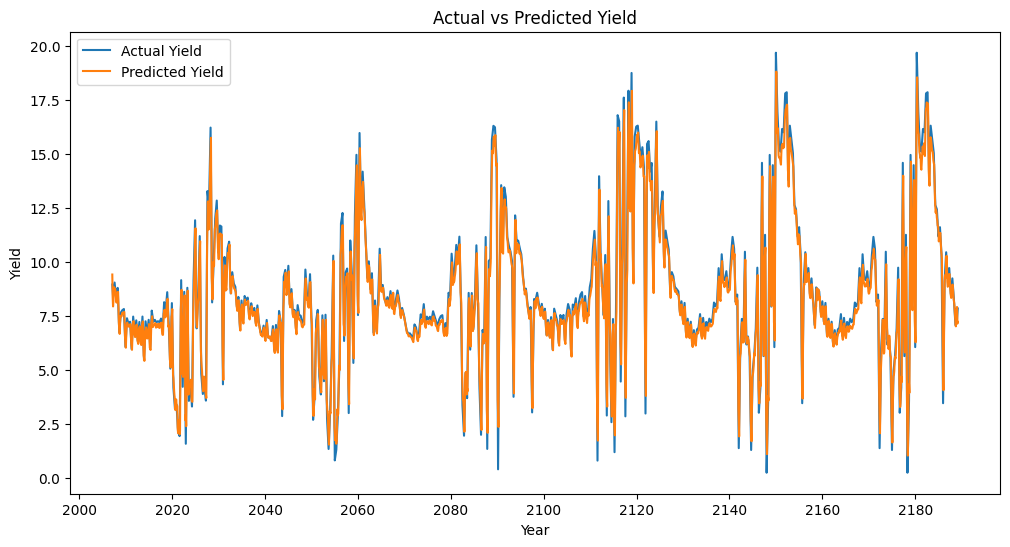

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np # Import numpy

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
# Assuming 'yield' is the 3rd feature (index 2) that was scaled
# We need to create dummy arrays with the same shape as the original scaled data
# to inverse transform the predictions and actual values correctly.

# Inverse transform predictions
y_pred_reshaped = np.zeros((len(y_pred), scaled_features.shape[1]))
y_pred_reshaped[:, 2] = y_pred.flatten()
y_pred_original = scaler.inverse_transform(y_pred_reshaped)[:, 2]

# Inverse transform actual values
y_test_reshaped = np.zeros((len(y_test), scaled_features.shape[1]))
# Reshape y_test to match the expected shape for inverse_transform
y_test_reshaped[:, 2] = y_test.flatten()
y_test_original = scaler.inverse_transform(y_test_reshaped)[:, 2]


# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# You can also plot the predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Yield')
plt.plot(y_pred_original, label='Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.xlabel('Time Step')
plt.ylabel('Yield')
plt.legend()
plt.show()

## Make predictions

### Subtask:
Use the trained model to make predictions on new data.

**Reasoning**:
Use the trained LSTM model to make predictions on the testing data.

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions to the original scale
# Assuming 'yield' is the 3rd feature (index 2) that was scaled
y_pred_reshaped = np.zeros((len(y_pred), scaled_features.shape[1]))
y_pred_reshaped[:, 2] = y_pred.flatten()
y_pred_original = scaler.inverse_transform(y_pred_reshaped)[:, 2]

print("Sample predictions (original scale):")
print(y_pred_original[:10])

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Sample predictions (original scale):
[9.40981072 8.38213468 7.93102705 8.19066423 8.72786999 8.81895566
 8.65174562 8.75267655 8.67974061 8.42477953]


In [19]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test_original, y_pred_original)

print(f"R-squared (R2): {r2:.4f}")

R-squared (R2): 0.9665
